Task 1
1. Установите библиотеку sympy.
2. Используя ее функции, напишите свою функцию, которая на вход примет математическую функцию y=f(x) вида x**2 - x + 21, и вернёт производную: 2𝑥−1.

In [9]:
import sympy as sp
import numpy as np
import seaborn as sns

In [10]:
x, y, w, b, i, n = sp.symbols('x y w b i n')

In [11]:
def df(func):
    return sp.diff(func,x)

In [12]:
df(x**2 - x + 21)

2*x - 1

In [15]:
def partial__df(func, arg):
    return sp.diff(func, arg)

In [16]:
partial__df((x-y)**2,y)

-2*x + 2*y

In [17]:
partial__df((x-y)**2,x)

2*x - 2*y

In [26]:
mse = sp.Sum((sp.Indexed(y,i) - w * sp.Indexed(x,i) - b) ** 2, (i,1,n))/n

In [27]:
mse

Sum((-b - w*x[i] + y[i])**2, (i, 1, n))/n

In [28]:
partial__df(mse, b)

Sum(2*b + 2*w*x[i] - 2*y[i], (i, 1, n))/n

In [29]:
partial__df(mse, w)

Sum(-2*(-b - w*x[i] + y[i])*x[i], (i, 1, n))/n

In [235]:
class Gradient:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
    def predict(self, w=0, b=0):
        return w * self.X + b
    def ms(self, Y_pred):
        return sum((Y_pred - self.Y) ** 2) / len(self.X)
    def update(self, w=0, b=0, a=0.00001): # a - lerning rate
        w_temp, b_temp = w, b
        dw = sum(-2 * (- b_temp - w_temp * self.X + self.Y) * self.X) / len(self.X)
        db = sum(2 * (b_temp + w_temp * self.X - self.Y)) / len(self.X)
        w = w_temp - a * dw
        b = b_temp - a * db
        return w, b
    def optimaze(self, num_interations, stopping_threshold, w=0, b=0):
        Y_pred = self.predict(w,b)
        mse = self.ms(Y_pred)
        for _ in range(num_interations):
            w, b = self.update(w, b)
            Y_pred = self.predict(w, b)
            if abs(mse - self.ms(Y_pred)) < stopping_threshold:
                print("stopping_threshold")
                return w, b, self.ms(Y_pred)
            mse = self.ms(Y_pred)
        print('num_interations')
        return w, b, self.ms(Y_pred)

In [236]:
n = 100
X = np.array(range(100, 200))
Y = 5 * X + 10 + np.random.normal(0,1,100)
print(X)
print(Y)

[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199]
[ 507.49788222  515.8521725   519.89122471  524.82941204  529.28766075
  534.15235695  541.80710887  543.708681    550.41132458  554.7163044
  559.24781067  564.61410104  569.48932521  575.92313614  580.71047009
  584.70805936  590.33599199  595.58079021  599.62143483  605.52175455
  610.59614723  615.70538135  620.64113629  626.59785769  628.53955111
  636.78169095  639.28751905  644.64634329  650.93959992  652.89637686
  658.02284113  664.65186563  669.00934294  673.45137868  678.85990978
  684.22642134  690.84635772  695.27597398  700.08604319  704.58897606
  710.32706617  713.632432

c:\anaconda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

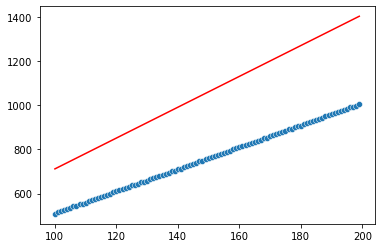

In [237]:
sns.scatterplot(X, Y)
sns.lineplot(x=X, y=7 * X + 12, color='red')

In [238]:
grad = Gradient(X=X, Y=Y)

In [239]:
w = 7
b = 12
y_pred = grad.predict(w=w, b=b)
y_pred

array([ 712,  719,  726,  733,  740,  747,  754,  761,  768,  775,  782,
        789,  796,  803,  810,  817,  824,  831,  838,  845,  852,  859,
        866,  873,  880,  887,  894,  901,  908,  915,  922,  929,  936,
        943,  950,  957,  964,  971,  978,  985,  992,  999, 1006, 1013,
       1020, 1027, 1034, 1041, 1048, 1055, 1062, 1069, 1076, 1083, 1090,
       1097, 1104, 1111, 1118, 1125, 1132, 1139, 1146, 1153, 1160, 1167,
       1174, 1181, 1188, 1195, 1202, 1209, 1216, 1223, 1230, 1237, 1244,
       1251, 1258, 1265, 1272, 1279, 1286, 1293, 1300, 1307, 1314, 1321,
       1328, 1335, 1342, 1349, 1356, 1363, 1370, 1377, 1384, 1391, 1398,
       1405])

In [240]:
ms = grad.ms(y_pred)
ms

94000.35605610914

In [241]:
grad.update(w=w, b=b)

(6.0663548167759025, 11.993977769569)

In [242]:
grad = Gradient(X, Y)
w, b, mse = grad.optimaze(num_interations=500, stopping_threshold=0.001, w = 7, b = 12)

stopping_threshold


In [243]:
print(w, b)

4.986579764114149 11.98699134662455


c:\anaconda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

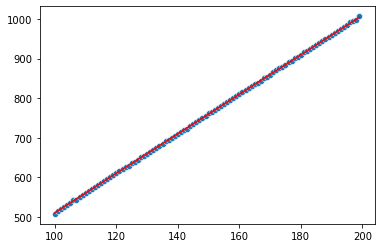

In [244]:
sns.scatterplot(X, Y)
sns.lineplot(x=X, y = w * X + b, color = "red")

dw = sum(-2 * (- b_temp - w_temp * self.X + self.Y) * self.X) / len(self.X)
        db = sum(2 * (b_temp + w_temp * self.X - self.Y)) / len(self.X)
        w = w_temp - a * dw
        b = b_temp - a * db



        w = w_temp - a * sum((2 * b_temp + 2 *w_temp * self.X - 2 * self.Y) *self.X) / len(self.X)
        b = b_temp - a * sum(2 * b_temp + 2 * w_temp *self.X - 2 * self.Y) / len(self.X)